In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smartphones_v3.csv')

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.head()

,brand_name,model,price,rating,has_5G,has_nfc,has_ir_blaster,processor_brand,core,processor_speed,...,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon,8.0,3.2,...,6.70,1440 x 3216,120,3,1.0,50.0,16.0,android,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon,8.0,2.2,...,6.59,1080 x 2412,120,3,1.0,64.0,16.0,android,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos,8.0,2.4,...,6.60,1080 x 2408,90,3,1.0,50.0,13.0,android,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon,8.0,2.2,...,6.55,1080 x 2400,120,3,1.0,50.0,16.0,android,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity,8.0,2.6,...,6.70,1080 x 2412,120,3,1.0,108.0,16.0,android,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5G                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   core                       974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  ram_capacity               980 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  internal_memory            980 non-null    float64
 13  battery_capacity           969 non-null    float64

### brand name
###### The top-10 brands smartphones in the market are Xiaomi with 17.3%, Samsung-17 %, followed by  Vivo, Realme, Oppo, Motorola, Apple, oneplus, poco, and tecno.

<Axes: ylabel='brand_name'>

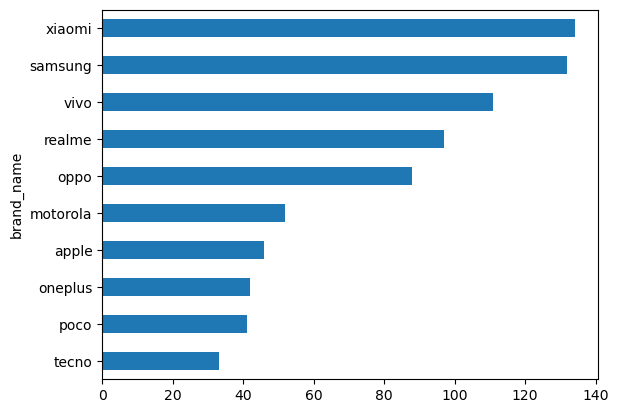

In [6]:
# Top 10 brand names
df['brand_name'].value_counts().head(10).sort_values().plot(kind='barh')

<Axes: ylabel='count'>

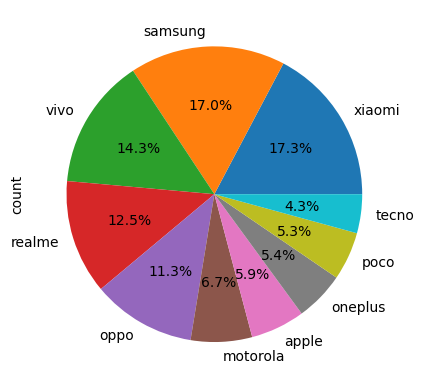

In [7]:
# percentage-wise
df['brand_name'].value_counts().head(10).plot(kind='pie', autopct = '%0.1f%%')

In [8]:
df['brand_name'].isnull().sum()

0

In [9]:
# model
df['model'].nunique()

980

### price
###### 1.It is not a normal distribution
###### 2.It has outliers
###### 3.Price column is right skewed.
###### 5.And the outliers does not depend on the other features of the phone so it of no use 
###### 6.The outlier phones are Vertu Signature Touch,Huawei Mate 50 RS Porsche Design, Xiaomi Redmi K20 Pro Signature Edition, Huawei Mate 30 RS Porsche Design, their price are beacuse of there design and the features are same as of other phones

In [10]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


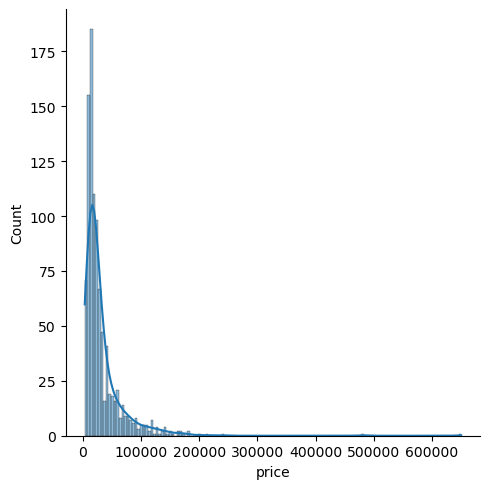

In [11]:
sns.displot(kind ='hist', data=df, x='price', kde=True)

In [12]:
df['price'].skew()

6.591790999665567

<Axes: >

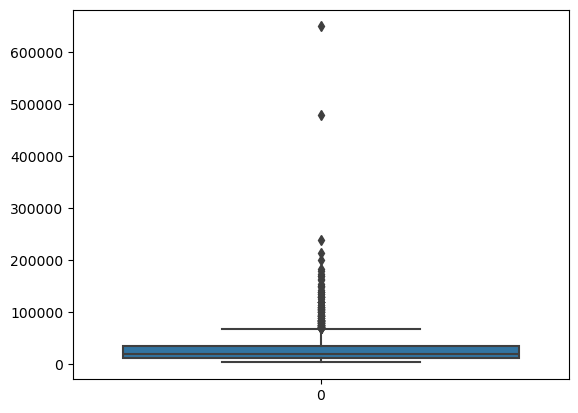

In [13]:
sns.boxplot(df['price'])

In [14]:
df[df['price'] > 200000]

,brand_name,model,price,rating,has_5G,has_nfc,has_ir_blaster,processor_brand,core,processor_speed,...,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,Snapdragon,8.0,1.50,...,4.70,1080 x 1920,60,1,1.0,13.0,2.1,android,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,Snapdragon,8.0,3.20,...,6.74,1212 x 2616,120,3,1.0,50.0,13.0,other,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,Snapdragon,8.0,2.80,...,6.39,1080 x 2340,60,3,1.0,48.0,20.0,android,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,Kirin,8.0,2.86,...,6.53,1176 x 2400,60,4,2.0,40.0,32.0,android,1,256.0


### rating
###### 1.The distribution is left skewed
###### 2.There are no outliers
###### 3.There are round 10% missing values

In [15]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


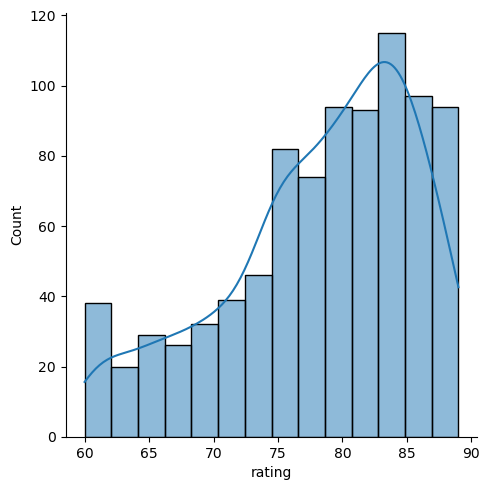

In [16]:
sns.displot(kind ='hist', data=df, x='rating', kde=True)

<Axes: >

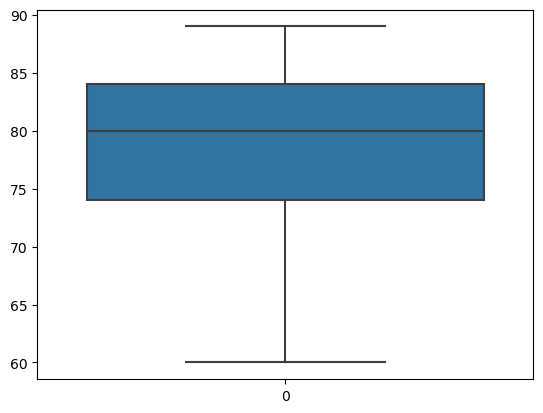

In [17]:
sns.boxplot(df['rating'])

In [18]:
(df['rating'].isnull().sum()/980) * 100

10.306122448979592

#### has_5G / has_nfc / has_ir_blaster
###### 1.There are round 56% phones in the market with 5G feature 
###### 2.Only 40% phones in the market has nfc feature
###### 3.has_ir_blaster feature is mostly provided in chinese phones

Text(0, 0.5, 'has_5G')

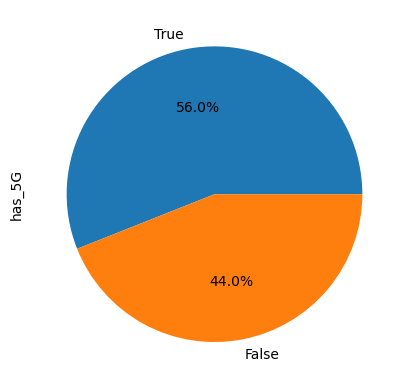

In [19]:
df['has_5G'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.ylabel("has_5G")

<Axes: ylabel='count'>

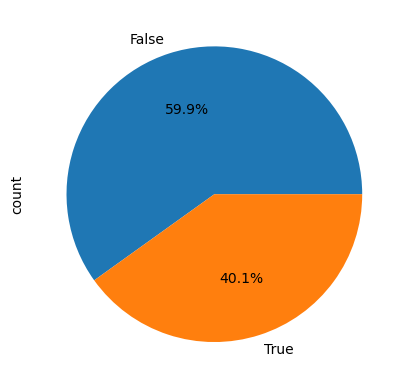

In [20]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

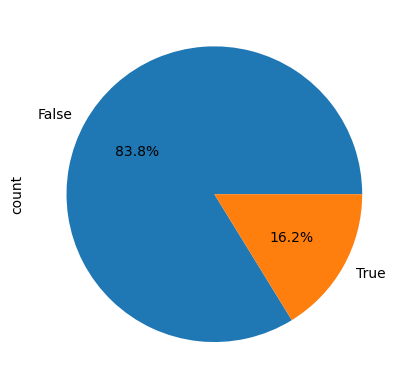

In [21]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [22]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

In [23]:
# processor_brand
# Helio and Dimensity are sub-brands of Mediatek
# Combine Helio, Dimensity and Mediatek

<Axes: ylabel='count'>

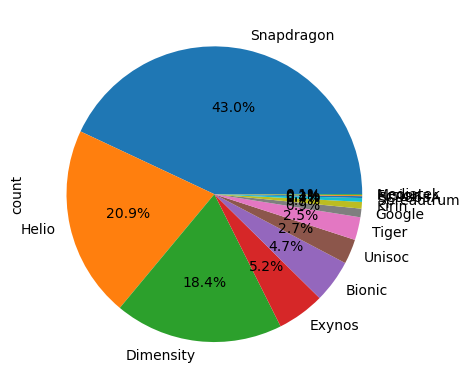

In [24]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [25]:
# Combine Helio, Dimensity and Mediatek
df['processor_brand'] = df['processor_brand'].replace('Helio','Mediatek')
df['processor_brand'] = df['processor_brand'].replace('Dimensity','Mediatek')

#### Core
###### 1. 92% phones in market are of Octa(8) core, followed by Hexa and Quad core

<Axes: ylabel='count'>

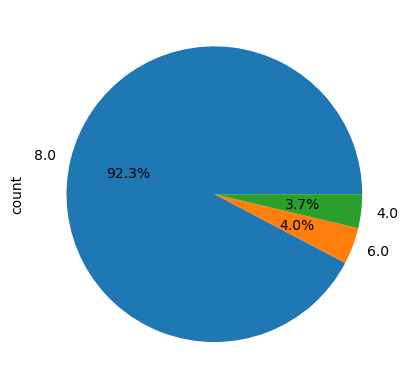

In [26]:
# core
df['core'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Fast Charging
###### 1.85% phones have fast charging availabel 

<Axes: ylabel='count'>

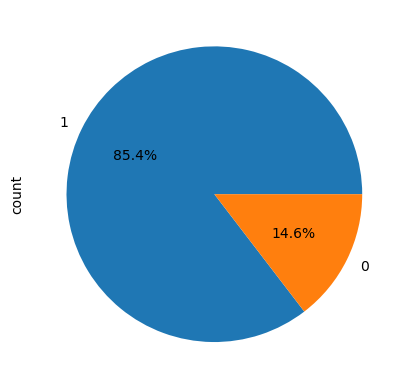

In [27]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Internal Memory
###### 1.Most phones in the market has 128 GB, followed by 64, 256 and others.

<Axes: ylabel='count'>

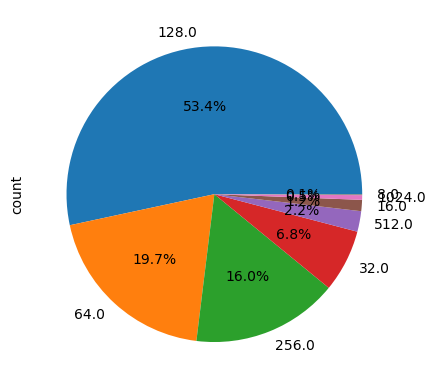

In [28]:
df['internal_memory'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

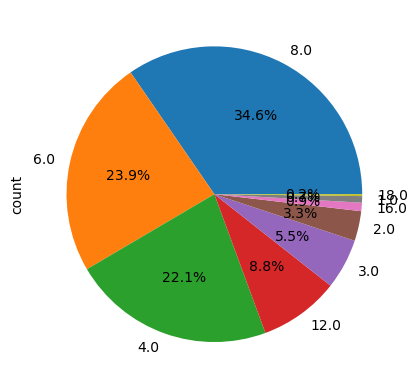

In [29]:
df['ram_capacity'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

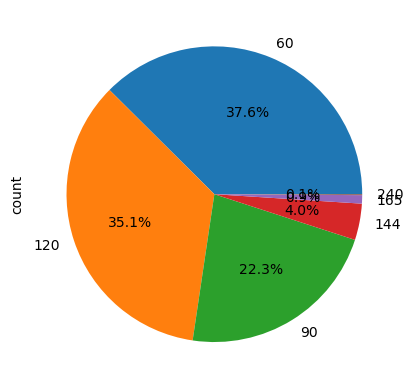

In [30]:
df['refresh_rate'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### total cameras
###### 1. 54% phones has 4 cameras, followed by 3 and 5
###### 2. Very few phones have 2 cameras nowdays

<Axes: ylabel='count'>

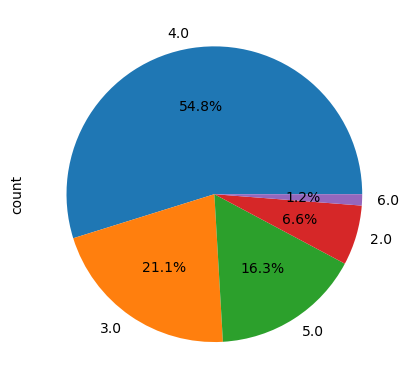

In [31]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie', autopct='%0.1f%%')

#### extended_memory_available
###### 1. 60% phones provide extended memory

<Axes: ylabel='count'>

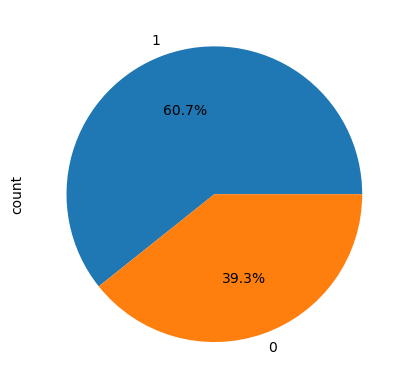

In [32]:
df['extended_memory_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### extended_upto
###### 1. 51% phones provide extension of memory upto 1 GB, followed 512 and 256 

<Axes: ylabel='count'>

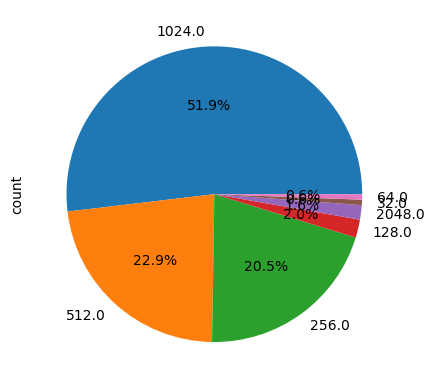

In [33]:
df['extended_upto'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [34]:
# processor_speed is a bimodal distribution
## most phones fall in the range of 2.00-2.50 and 2.75-3.25 and their are no outliers

# battery_capacity is right skewed and most data falls in the range of 2500-7000
## there are outliers in the battery_capacity

# screen-size is skewed and most of the smartphones screen-size falls in the range of 6.5-7
## there are outliers in the dataset

In [35]:
def plot_graphs(column_name):

    sns.displot(kind = 'hist', kde = True, data = df, x = column_name, label = column_name)
    sns.catplot(kind = 'box', data = df, x = column_name)

In [36]:
columns = df.select_dtypes(include = ['float64','int64']).iloc[:,[3,7,8,9,13,14,16]]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

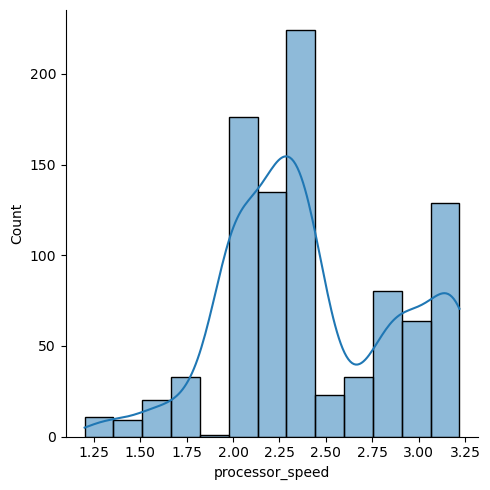

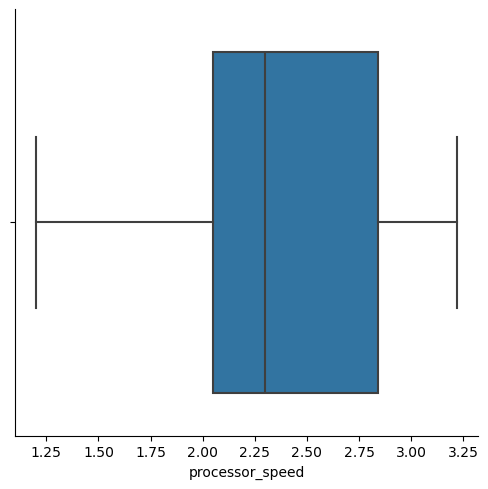

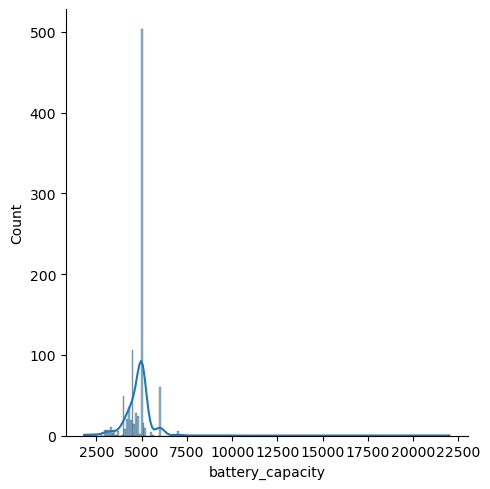

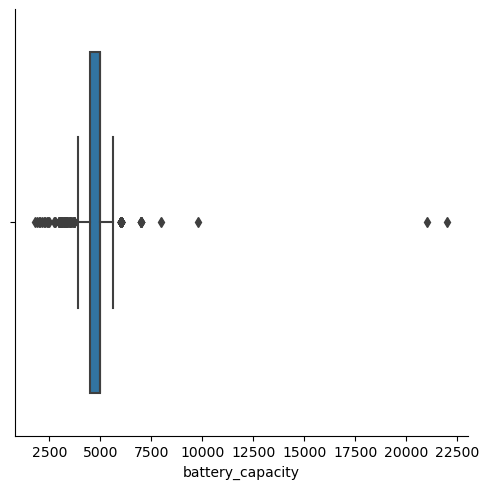

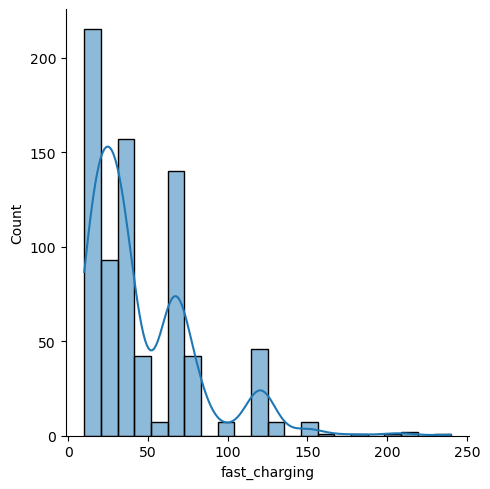

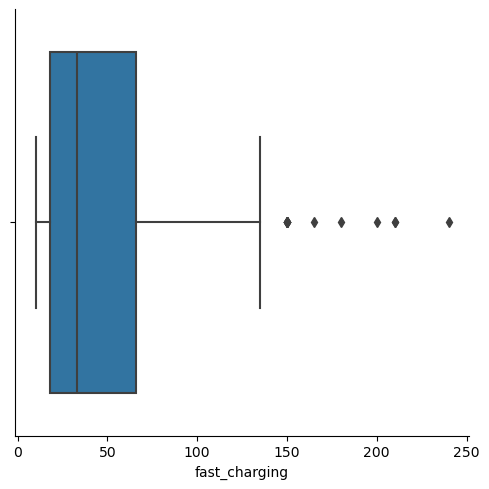

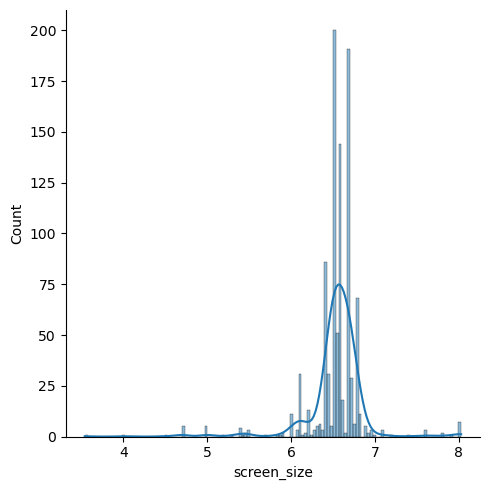

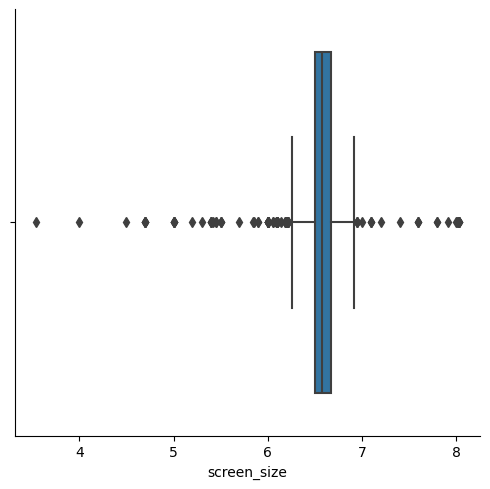

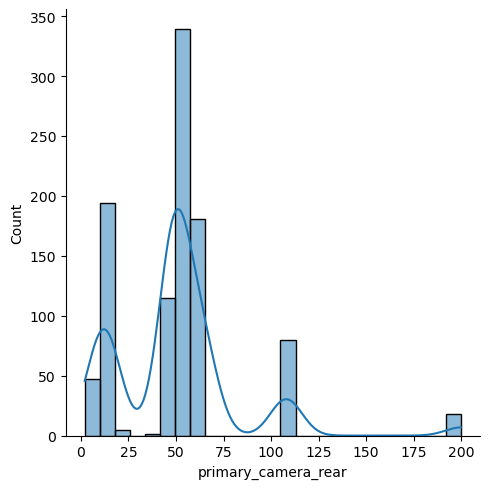

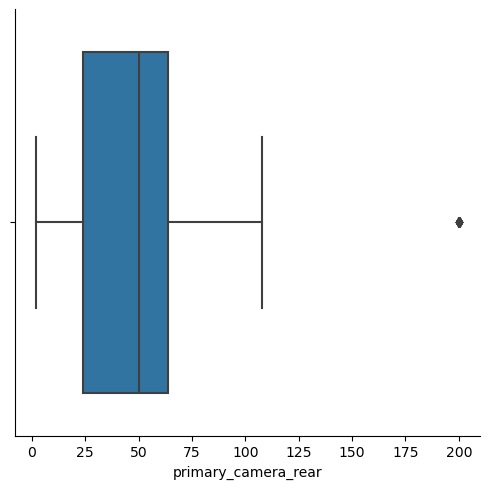

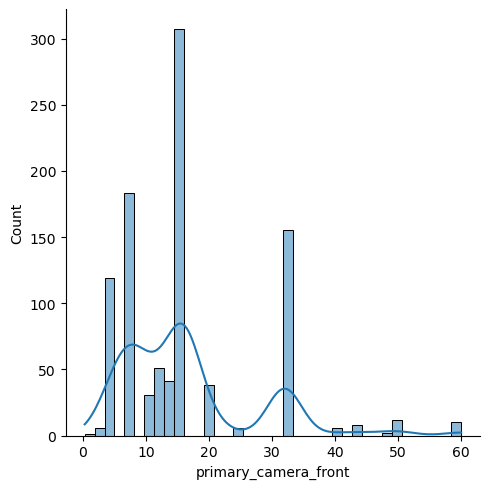

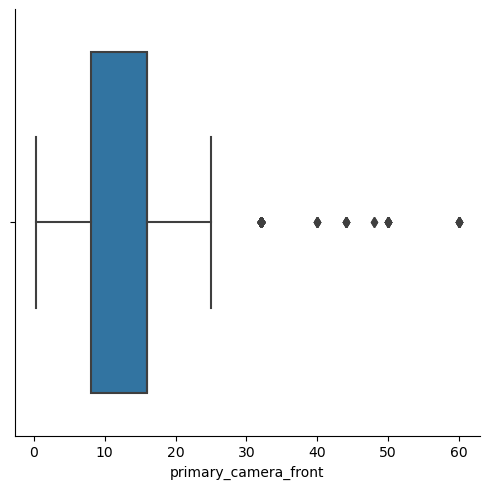

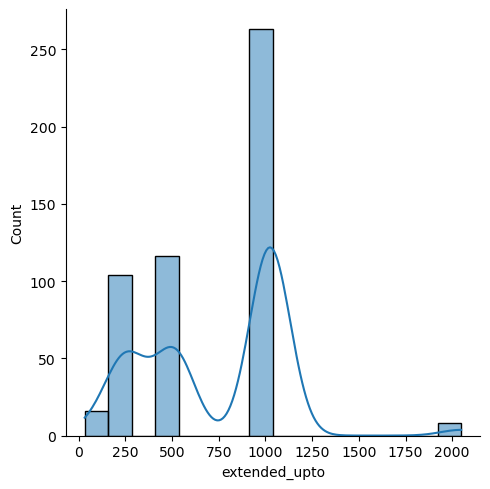

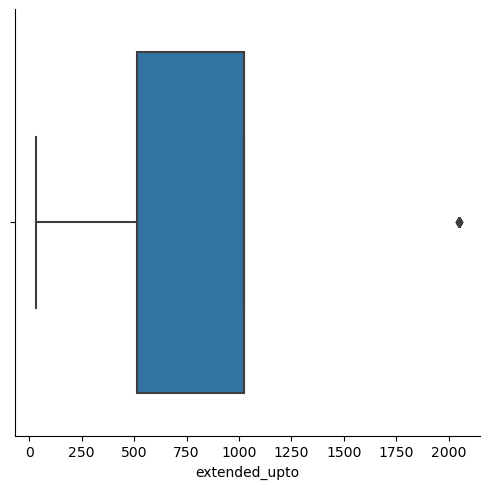

In [37]:
for col in columns:
    plot_graphs(col)

In [38]:
# Bivariate Analysis

In [39]:
# Brand_name vs. price

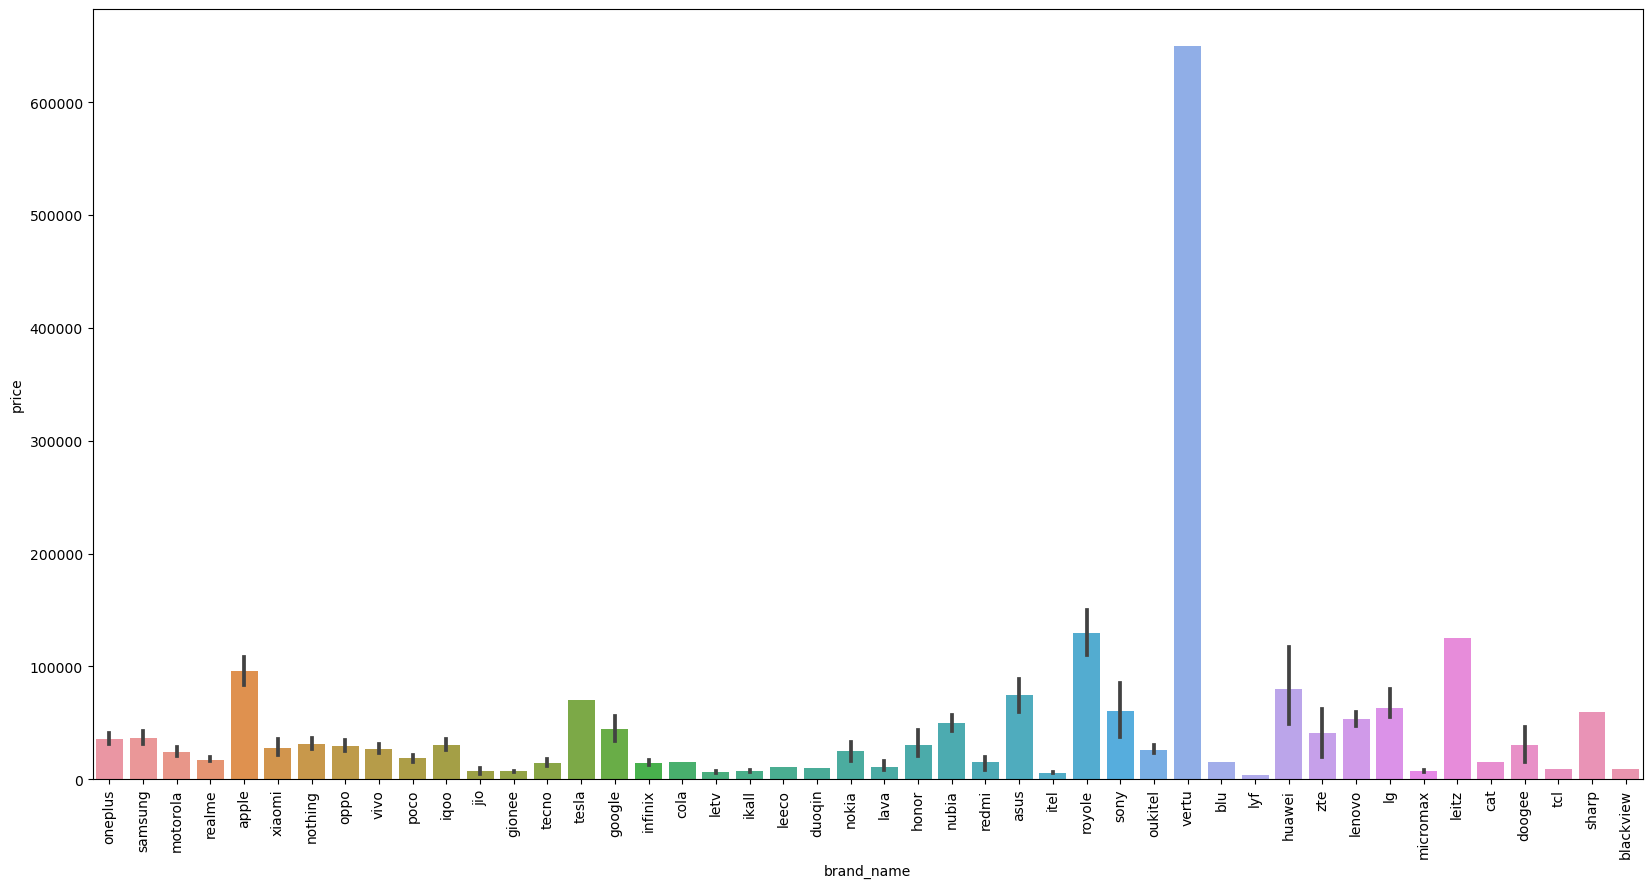

In [40]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = 'brand_name', y = 'price')
plt.xticks(rotation = 'vertical')
plt.show()

In [41]:
x = df.groupby('brand_name').count()['model']

In [42]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

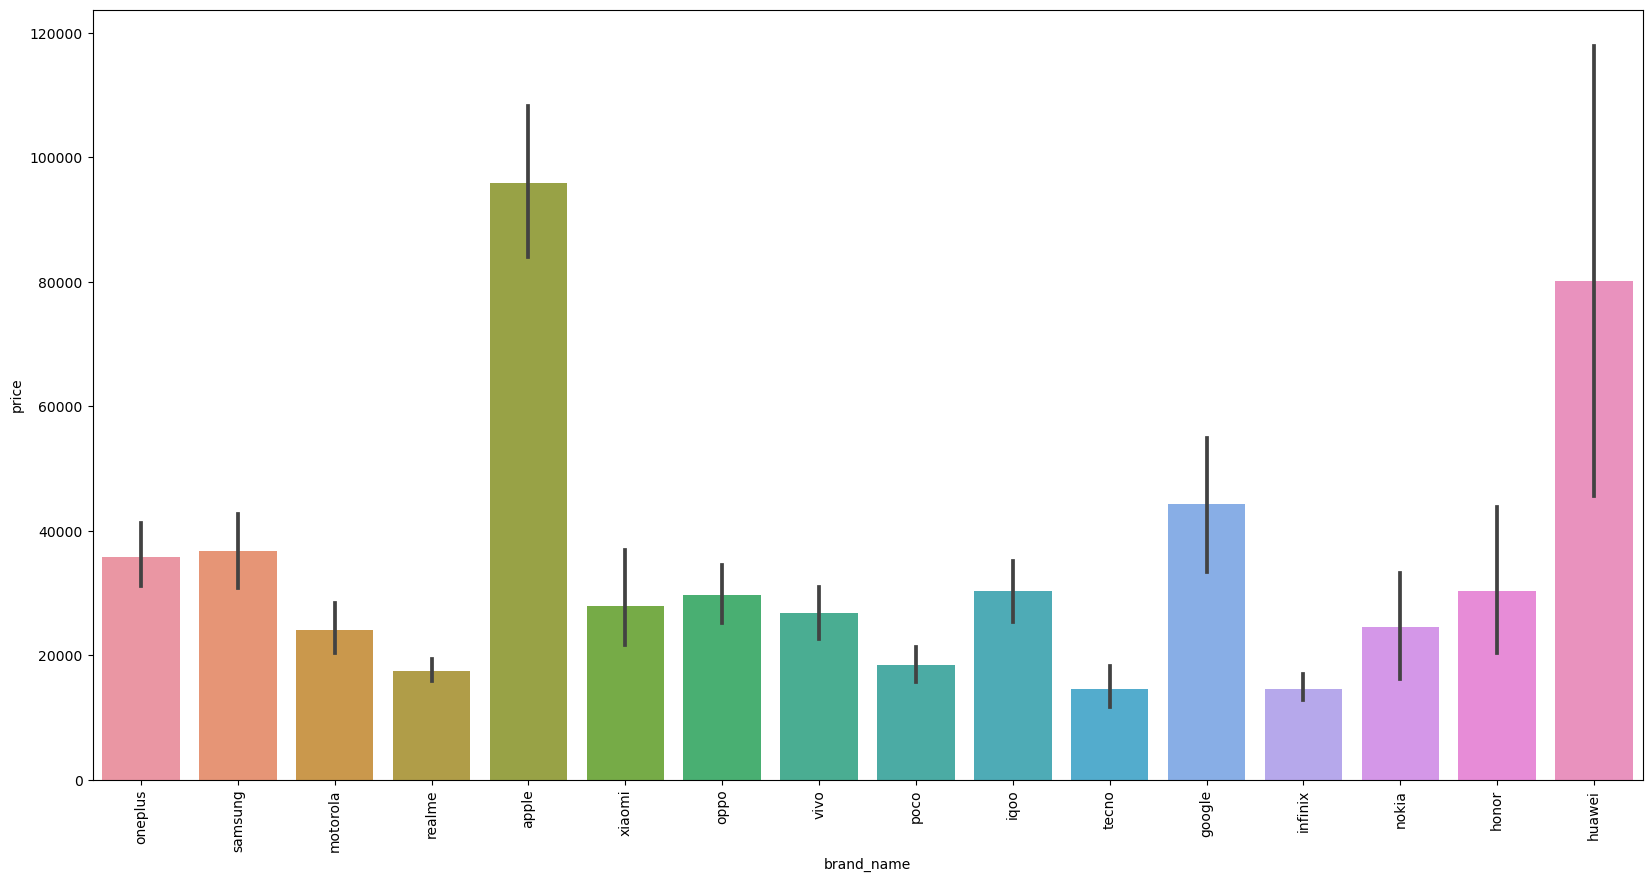

In [43]:
plt.figure(figsize = (20,10))
sns.barplot(data = temp_df, x = 'brand_name', y = df.price)
plt.xticks(rotation = 'vertical')
plt.show()

## Top-10 phones by price are apple, huawei, google, samsung, oneplus

#### Is there a correlation between price and ratings?
###### 1.There is no strong correlation between rating and price
###### -> There is no correlation between rating and price. Ratings are kind of similar for top phones. We can say ratings does not influence people in buying a particular phone.

<Axes: xlabel='rating', ylabel='price'>

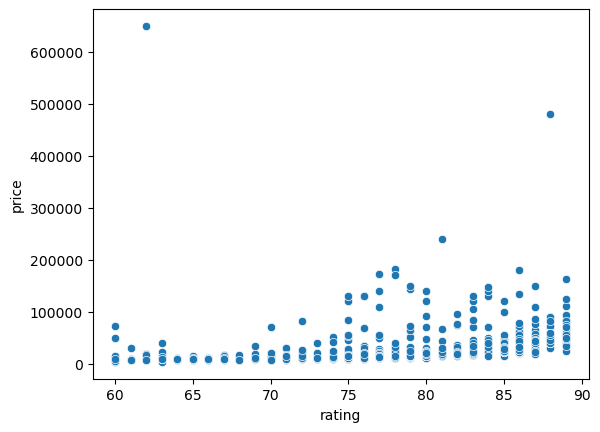

In [44]:
sns.scatterplot(data = df, x = 'rating', y = 'price')

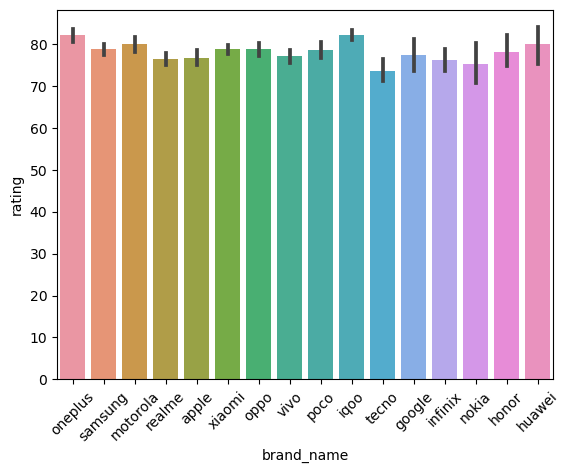

In [45]:
sns.barplot(data=temp_df, x='brand_name', y='rating')
plt.tick_params(axis='x', rotation=45)

#### Price vs. 5G / nfc / ir_blaster
###### - smartphones having 5G is costlier than phones without 5G. Pricing increases for the phones having 5G feature.
###### - smartphones having nfc is costlier than phones without nfc

<Axes: xlabel='has_5G', ylabel='price'>

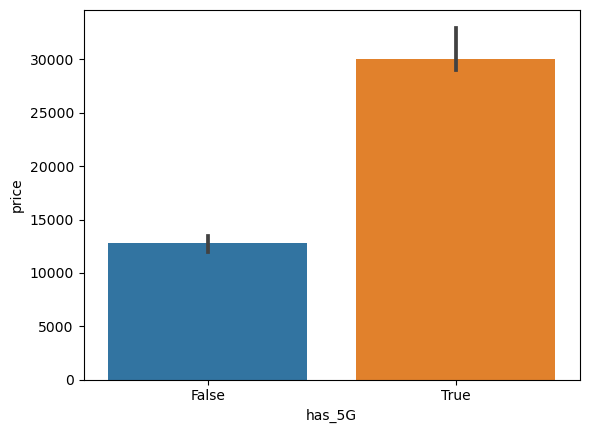

In [46]:
sns.barplot(data = df, x = 'has_5G', y = 'price', estimator = np.median)

In [47]:
# rating vs. has_nfc

<Axes: xlabel='has_nfc', ylabel='price'>

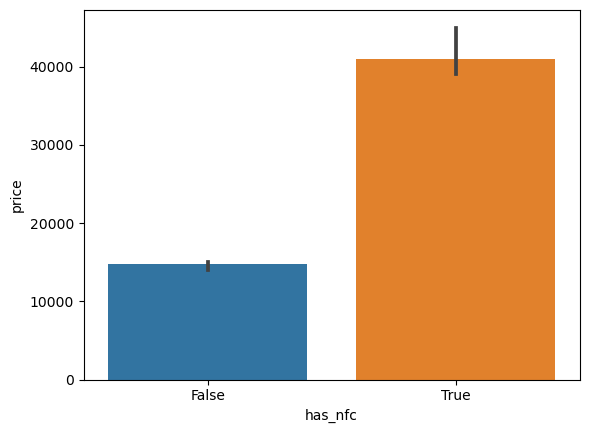

In [48]:
sns.barplot(data = df, x = 'has_nfc', y = 'price', estimator = np.median)

In [49]:
# rating vs. has_ir_blaster

<Axes: xlabel='has_ir_blaster', ylabel='price'>

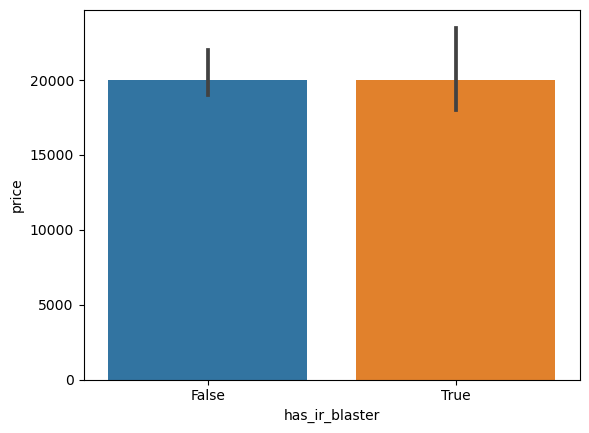

In [50]:
sns.barplot(data = df, x = 'has_ir_blaster', y = 'price', estimator = np.median)

#### Price vs. Processor_brand
###### - Bionic, Kirin, Google processsor phones are costlier
###### -> Bionic processor is in Apple phones
###### -> Check kirin and Google processor phones.

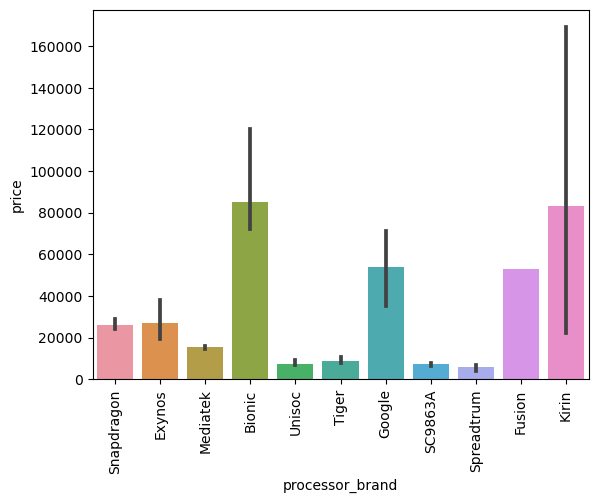

In [51]:
sns.barplot(data =df, x = 'processor_brand', y = 'price', estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

#### Price vs. Core
###### - Hexa core phones price are higher than the rest
###### -> Hexa core phones are higher in price because they are all apple phones.

<Axes: xlabel='core', ylabel='price'>

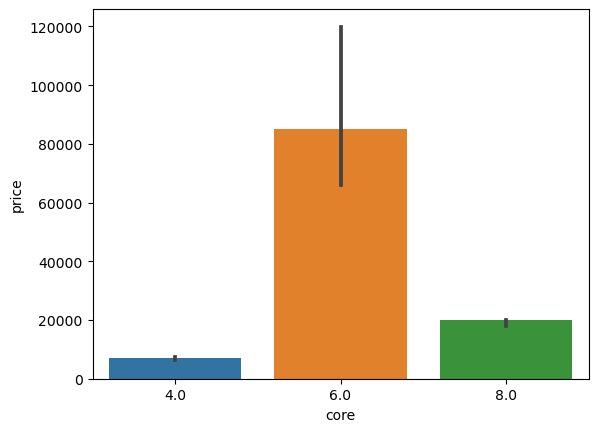

In [52]:
sns.barplot(data = temp_df, x = 'core', y = 'price', estimator = np.median)

In [53]:
df[df['core'] == 6.0]

,brand_name,model,price,rating,has_5G,has_nfc,has_ir_blaster,processor_brand,core,processor_speed,...,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_memory_available,extended_upto
6,apple,Apple iPhone 14,65999,81.0,True,True,False,Bionic,6.0,3.22,...,6.10,1170 x 2532,60,2,1.0,12.0,12.0,ios,0,NaN
15,apple,Apple iPhone 13,62999,79.0,True,True,False,Bionic,6.0,3.22,...,6.10,1170 x 2532,60,2,1.0,12.0,12.0,ios,0,NaN
27,apple,Apple iPhone 14 Pro Max,129990,76.0,True,True,False,Bionic,6.0,NaN,...,6.70,1290 x 2796,120,3,1.0,48.0,12.0,ios,0,NaN
33,apple,Apple iPhone 11,38999,73.0,False,True,False,Bionic,6.0,2.65,...,6.10,828 x 1792,60,2,1.0,12.0,12.0,ios,0,NaN
56,apple,Apple iPhone 14 Plus,74999,82.0,True,True,False,Bionic,6.0,3.22,...,6.70,1284 x 2778,60,2,1.0,12.0,12.0,ios,0,NaN
76,apple,Apple iPhone 13 Pro,119900,83.0,True,True,False,Bionic,6.0,3.22,...,6.10,1170 x 2532,120,3,1.0,12.0,12.0,ios,0,NaN
100,apple,Apple iPhone 14 Pro,119990,75.0,True,True,False,Bionic,6.0,NaN,...,6.10,1179 x 2556,120,3,1.0,48.0,12.0,ios,0,NaN
111,apple,Apple iPhone 12,51999,74.0,True,True,False,Bionic,6.0,3.10,...,6.10,1170 x 2532,60,2,1.0,12.0,12.0,ios,0,NaN
136,apple,Apple iPhone 11 (128GB),46999,75.0,False,True,False,Bionic,6.0,2.65,...,6.10,828 x 1792,60,2,1.0,12.0,12.0,ios,0,NaN
149,apple,Apple iPhone 12 Mini,40999,74.0,True,True,False,Bionic,6.0,3.10,...,5.40,1080 x 2340,60,2,1.0,12.0,12.0,ios,0,NaN


##### What are the most common operating systems among smartphones in the dataset?
###### -> 94% phones in the market are android phones, followed by ios and then the others

In [54]:
pd.crosstab(df['core'],df['os'])

os,android,ios,other
core,,,
4.0,33,1,1
6.0,0,39,0
8.0,876,1,9


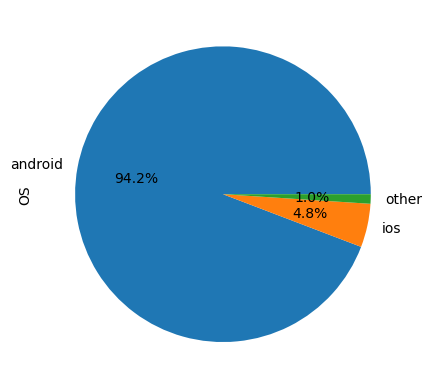

In [55]:
df['os'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.ylabel("OS")
plt.show()

<Axes: xlabel='processor_speed', ylabel='price'>

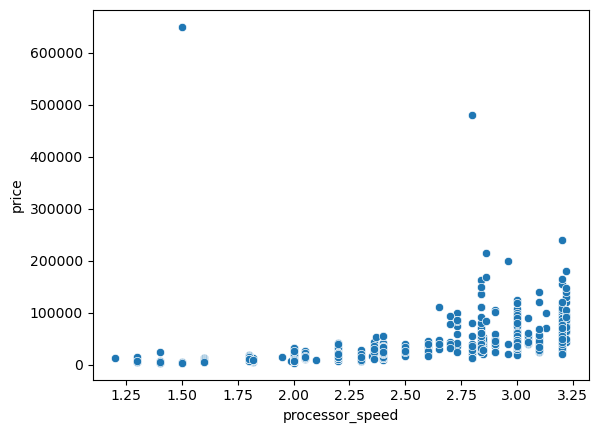

In [56]:
sns.scatterplot(data = df, x = 'processor_speed', y = 'price')

##### How does the pricing vary among different brands and operating systems?
###### Apple phone is the highest priced phone followed by huawei, google, samsung, oneplus and then rest.
###### According to operating system IOS is the most priced operating system, obvious beacause of Apple and the least priced operating system is android.

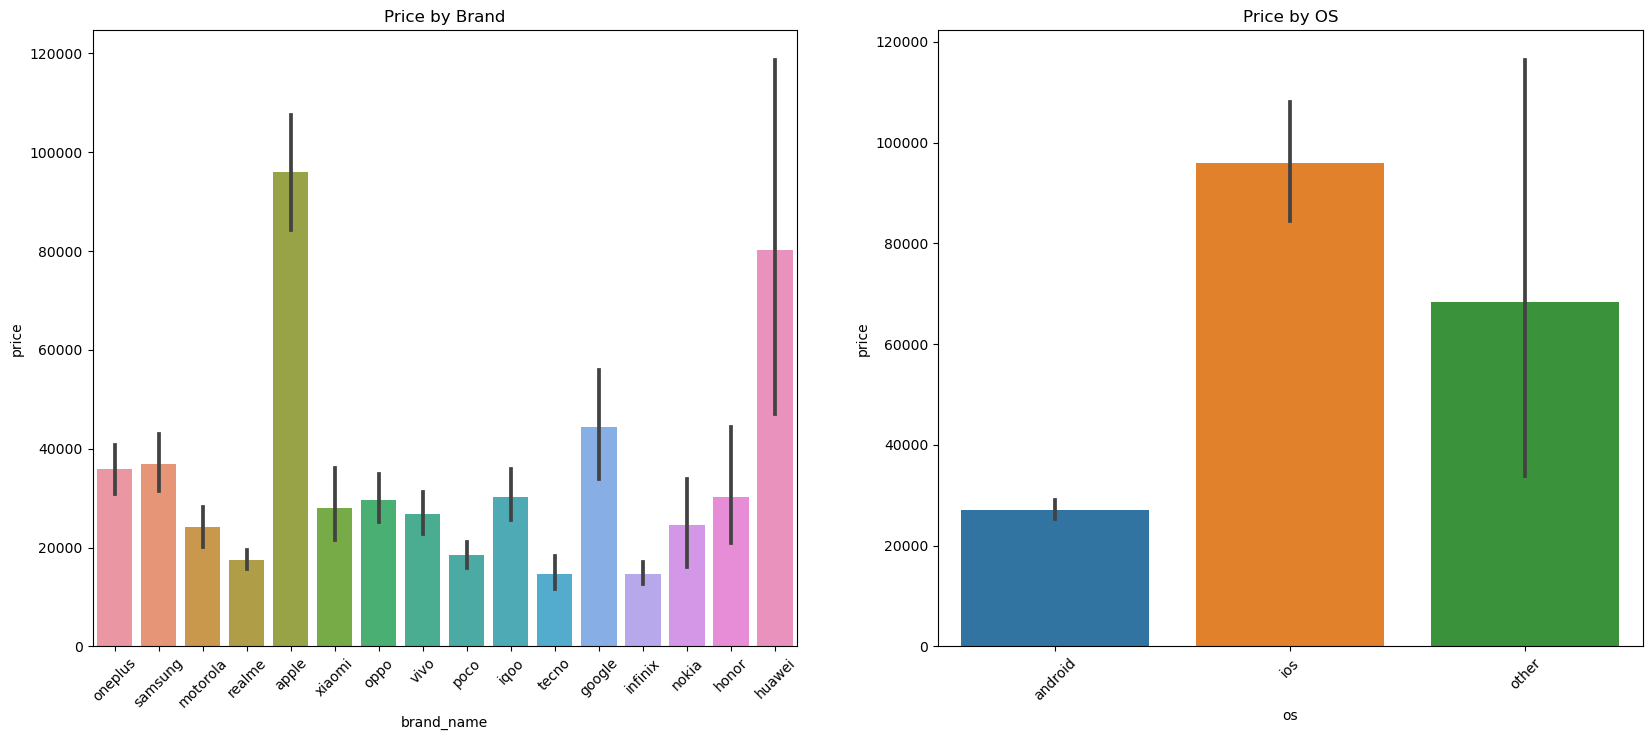

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns for subplots

# Subplot 1: Bar chart for 'brand_name'
sns.barplot(data=temp_df, x='brand_name', y=df.price, ax=axs[0])
axs[0].set_title('Price by Brand')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Subplot 2: Bar chart for 'os'
sns.barplot(data=temp_df, x='os', y=df.price, ax=axs[1])
axs[1].set_title('Price by OS')
axs[1].tick_params(axis='x', rotation=45)

##### What is the distribution of screen sizes and how does it correlate with pricing?
###### Most of the phones screen_size falls in the range of 6-7.
###### There isn't much correlation in screen_size and price.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


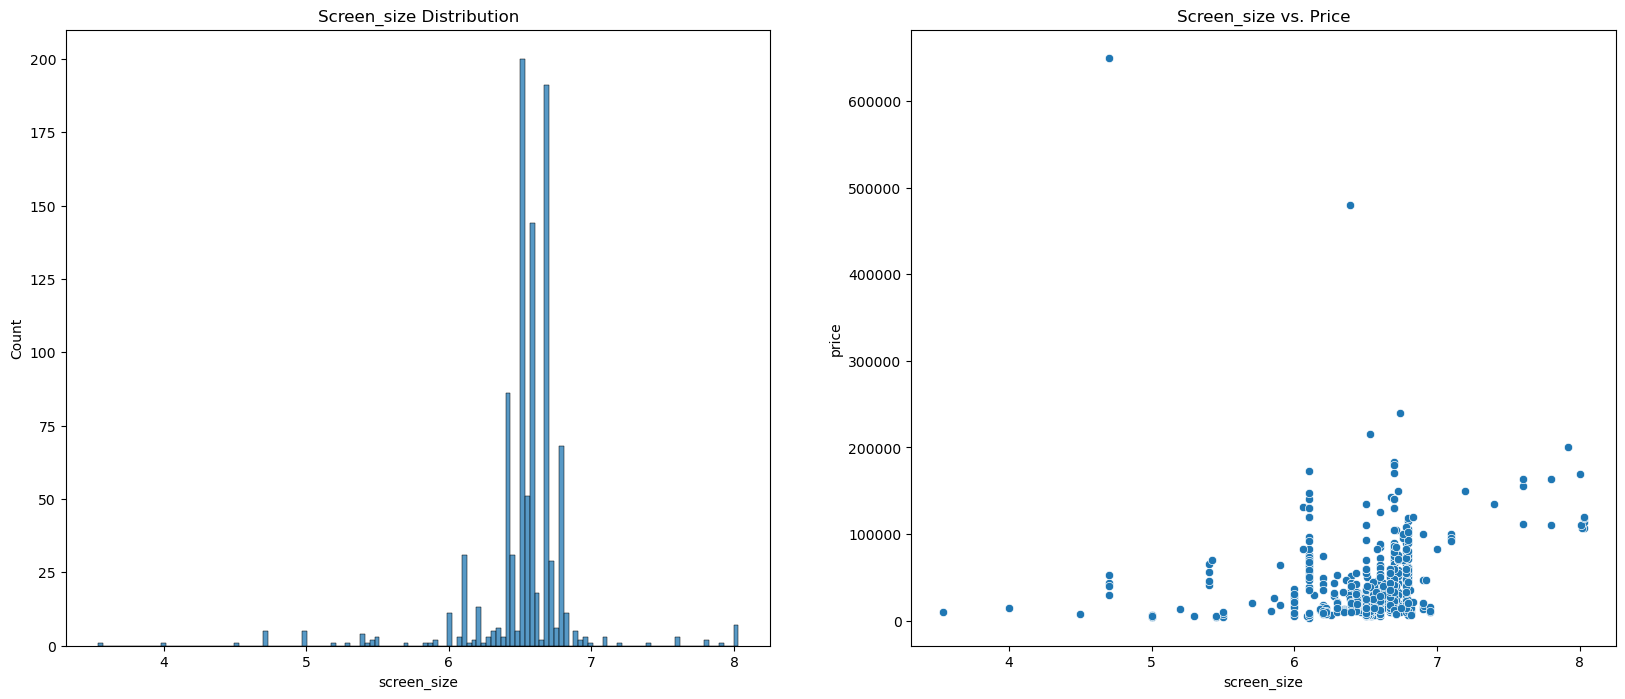

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns for subplots

# Subplot 1: Bar chart for 'brand_name'
sns.histplot(data=df, x='screen_size', ax=axs[0])
axs[0].set_title('Screen_size Distribution')
axs[0].tick_params(axis='x')

sns.scatterplot(data = df, x='screen_size', y='price', ax=axs[1])
axs[1].set_title('Screen_size vs. Price')

plt.show()

##### How does pricing vary based on processor brand, core, processor speed?
###### Bionic processor_brand is costly followed by kirin, google, fusion, snapdragon, exynos and then the rest.
###### Hexa core processor_speed phones has high prices and octa core has lowest prices.
###### There is a slight correlation between processor_speed and price, as processor_speed is increasing price is slightly increasing.

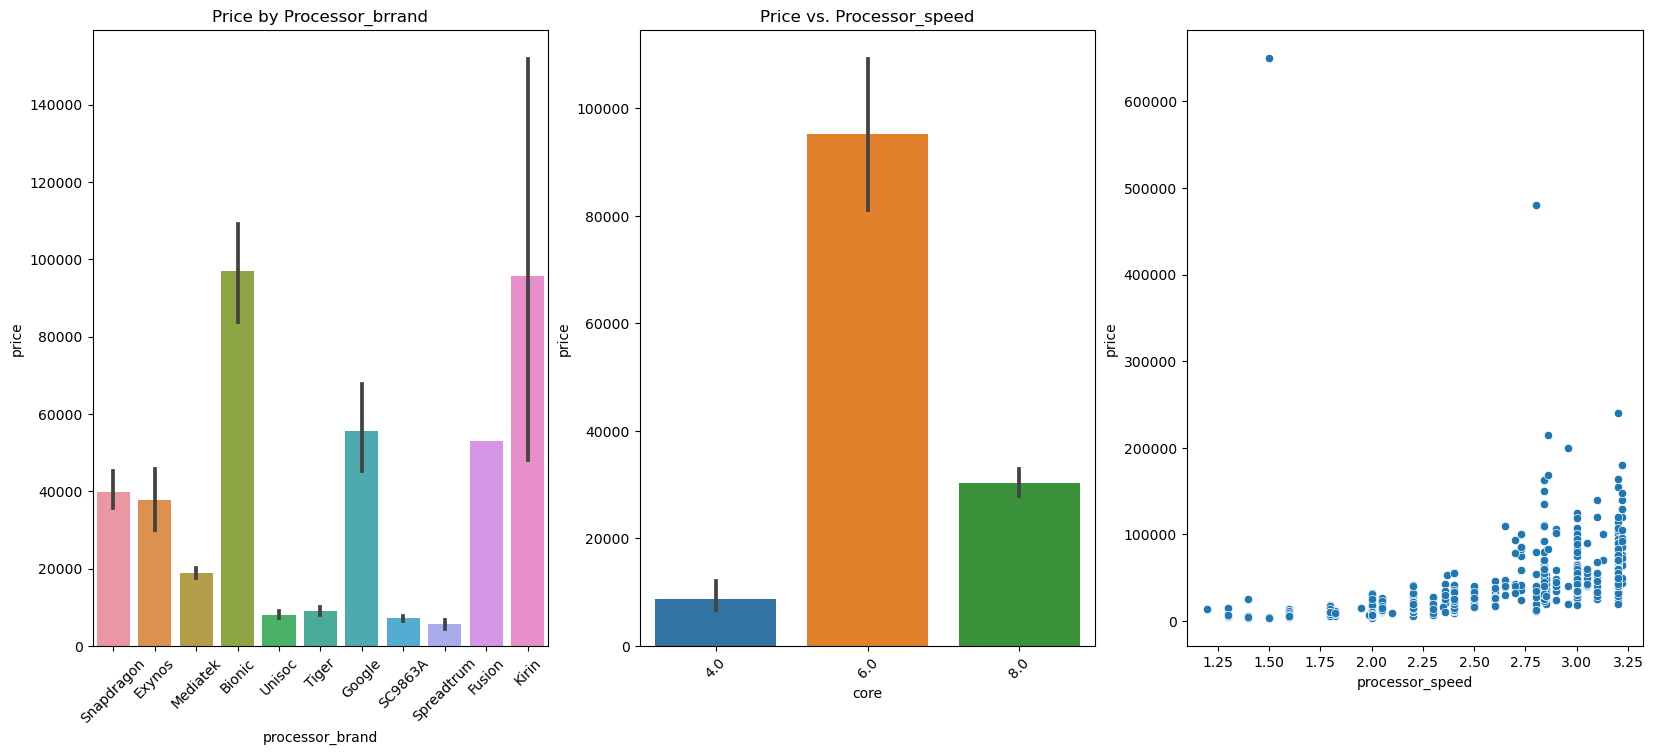

In [101]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))  # 1 row, 2 columns for subplots

# Subplot 1: Bar chart for 'brand_name'
sns.barplot(data=df, x='processor_brand', y=df.price, ax=axs[0])
axs[0].set_title('Price by Processor_brrand')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Subplot 2: Bar chart for 'os'
sns.barplot(data=df, x='core', y=df.price, ax=axs[1])
axs[1].set_title('Price by Core')
axs[1].tick_params(axis='x', rotation=20)

# Subplot 2: Bar chart for 'os'
sns.scatterplot(data=df, x='processor_speed', y=df.price, ax=axs[2])
axs[1].set_title('Price vs. Processor_speed')
axs[1].tick_params(axis='x', rotation=45)

##### Is there a correlation between Ram Capacity and pricing?
###### there is no correlation between ram capacity and price, we can say that price is not dependent on ram capacity.

<Axes: xlabel='ram_capacity', ylabel='price'>

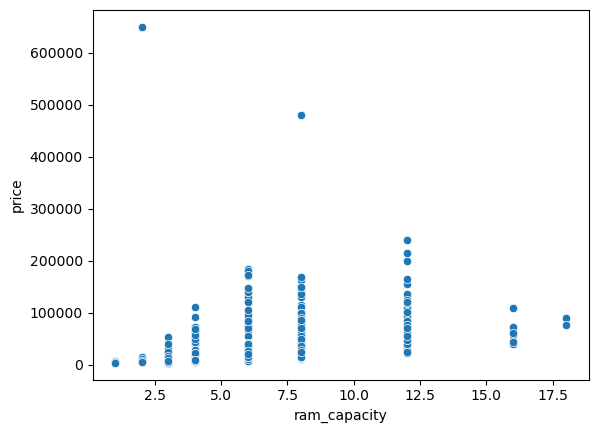

In [60]:
sns.scatterplot(data=df, x = 'ram_capacity', y = 'price')

In [61]:
df.head()

,brand_name,model,price,rating,has_5G,has_nfc,has_ir_blaster,processor_brand,core,processor_speed,...,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon,8.0,3.2,...,6.70,1440 x 3216,120,3,1.0,50.0,16.0,android,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon,8.0,2.2,...,6.59,1080 x 2412,120,3,1.0,64.0,16.0,android,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos,8.0,2.4,...,6.60,1080 x 2408,90,3,1.0,50.0,13.0,android,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon,8.0,2.2,...,6.55,1080 x 2400,120,3,1.0,50.0,16.0,android,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Mediatek,8.0,2.6,...,6.70,1080 x 2412,120,3,1.0,108.0,16.0,android,0,NaN


##### num_rear_cameras, num_front_cameras, primary_camera_rear, primary_camera_front
###### num_rear_cameras - as the camera no. is increasing the price is increasing but there isn't much difference between 3 & 4 cameras.
###### num_front_cameras - the phones has either two front cameras or 1 front camera and the price is high for 2 cameras.
###### primary_camera_rear - as the pixels are increasing the price are also increasing.
###### primary_camera_front - 36-48 prices are high than 48-60
###### most of the phones in primary_camera_front above 38 pixels are either vivo, motorola, some samsung.

<Axes: xlabel='num_front_cameras', ylabel='price'>

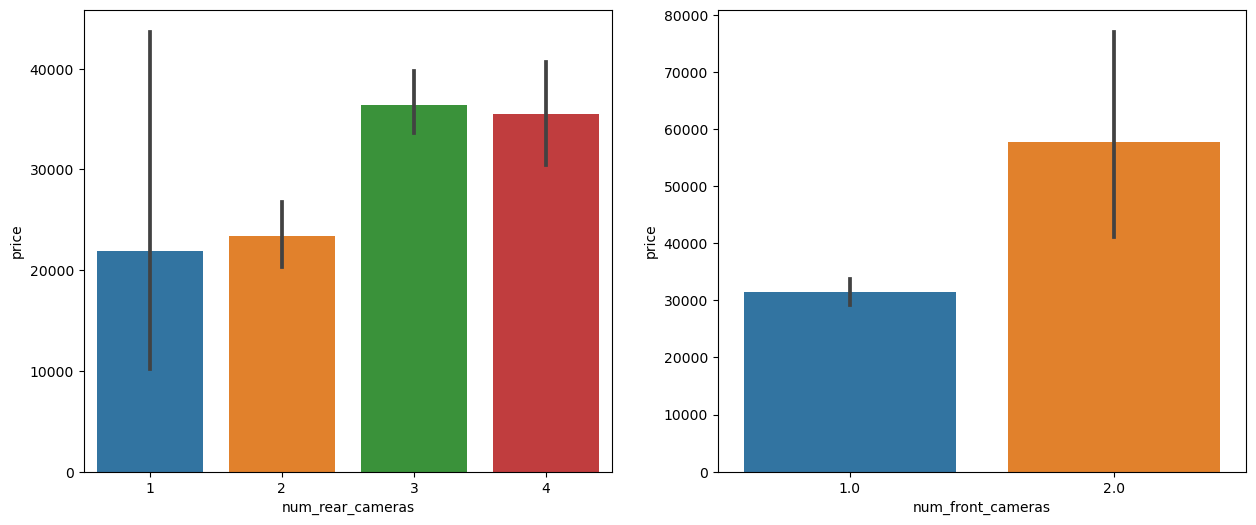

In [62]:
fig, ax = plt.subplots(1,2 , figsize = (15,6))
sns.barplot(data=df, x = 'num_rear_cameras', y = 'price', ax = ax[0])
sns.barplot(data=df, x = 'num_front_cameras', y = 'price', ax = ax[1])

In [80]:
# creating temporary df
temp_df = df[['brand_name','primary_camera_rear','primary_camera_front','price']]

In [96]:
# creating bins for rear_camera and front_camera 
num_bins = 5  # Number of bins
temp_df['rear_camera_bins'] = pd.cut(temp_df['primary_camera_rear'], bins=num_bins)
temp_df['front_camera_bins'] = pd.cut(temp_df['primary_camera_front'], bins=num_bins)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19728\64067712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['rear_camera_bins'] = pd.cut(temp_df['primary_camera_rear'], bins=num_bins)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19728\64067712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['front_camera_bins'] = pd.cut(temp_df['primary_camera_front'], bins=num_bins)


In [77]:
temp_df.drop(columns = 'camera_bins', inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19728\3395363826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns = 'camera_bins', inplace = True)


In [97]:
temp_df.head()

,brand_name,primary_camera_rear,primary_camera_front,price,rear_camera_bins,front_camera_bins
0,oneplus,50.0,16.0,54999,"(41.6, 81.2]","(12.24, 24.18]"
1,oneplus,64.0,16.0,19989,"(41.6, 81.2]","(12.24, 24.18]"
2,samsung,50.0,13.0,16499,"(41.6, 81.2]","(12.24, 24.18]"
3,motorola,50.0,16.0,14999,"(41.6, 81.2]","(12.24, 24.18]"
4,realme,108.0,16.0,24999,"(81.2, 120.8]","(12.24, 24.18]"


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


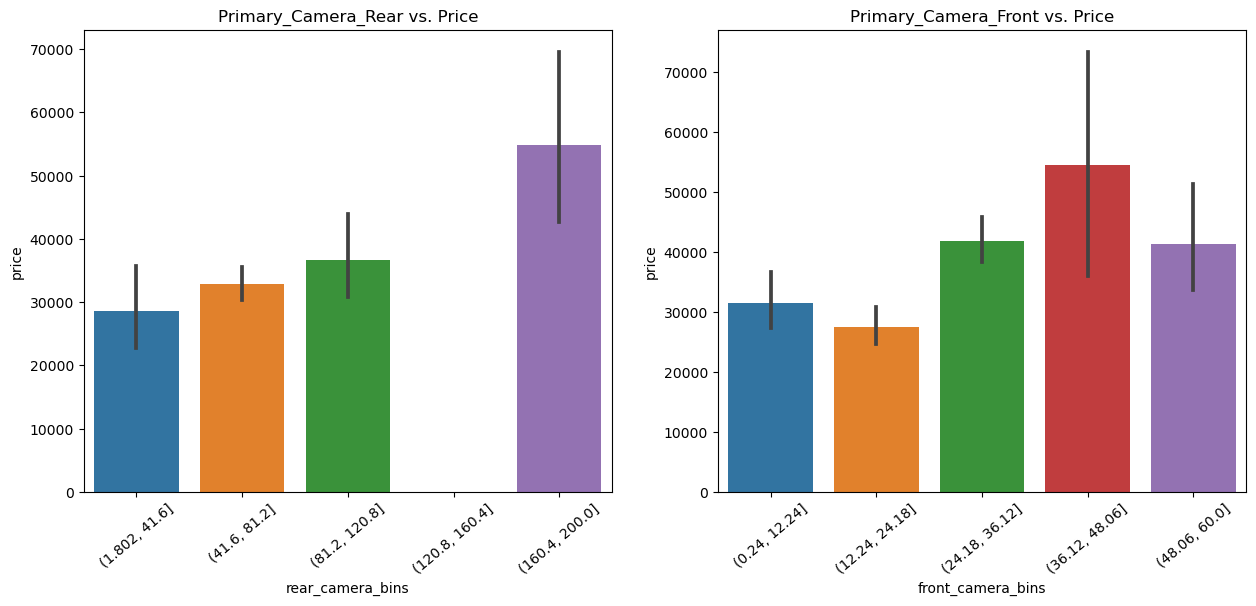

In [99]:
# 
fig, ax = plt.subplots(1,2 , figsize = (15,6))
sns.barplot(data=temp_df, x = 'rear_camera_bins', y = 'price', ax = ax[0])
sns.barplot(data=temp_df, x = 'front_camera_bins', y = 'price', ax = ax[1])

# set title and other parameters
ax[0].set_title("Primary_Camera_Rear vs. Price")
ax[0].tick_params(axis='x', rotation= 40)

ax[1].set_title("Primary_Camera_Front vs. Price")
ax[1].tick_params(axis='x', rotation= 40)

In [106]:
df[(df['primary_camera_front'] > 38) & (df['primary_camera_front'] < 48)]

,brand_name,model,price,rating,has_5G,has_nfc,has_ir_blaster,processor_brand,core,processor_speed,...,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_memory_available,extended_upto
37,samsung,Samsung Galaxy S22 Ultra 5G,91999,NaN,True,True,False,Snapdragon,8.0,3.00,...,6.80,1440 x 3080,120,4,1.0,108.0,40.0,android,0,NaN
238,vivo,Vivo Y75 4G,19990,82.0,False,False,False,Mediatek,8.0,2.05,...,6.44,1080 x 2400,60,3,1.0,50.0,44.0,android,1,1024.0
279,vivo,Vivo V23e 5G,21994,84.0,True,False,False,Mediatek,8.0,2.40,...,6.44,1080 x 2400,60,3,1.0,50.0,44.0,android,0,NaN
311,samsung,Samsung Galaxy S22 Ultra 5G (12GB RAM + 512GB),118999,NaN,True,True,False,Snapdragon,8.0,3.00,...,6.80,1440 x 3080,120,4,1.0,108.0,40.0,android,0,NaN
326,samsung,Samsung Galaxy S21 Ultra,105999,NaN,True,True,False,Exynos,8.0,2.90,...,6.80,1440 x 3200,120,4,1.0,108.0,40.0,android,0,NaN
369,vivo,Vivo V21 Pro,32999,85.0,True,False,False,Snapdragon,8.0,2.40,...,6.44,1080 x 2400,60,4,2.0,64.0,44.0,android,0,NaN
524,vivo,Vivo V20,23269,85.0,False,False,False,Snapdragon,8.0,2.30,...,6.44,1080 x 2400,60,3,1.0,64.0,44.0,android,1,1024.0
590,vivo,Vivo V21,24999,83.0,False,False,False,Mediatek,8.0,2.40,...,6.44,1080 x 2400,90,3,1.0,64.0,44.0,android,0,NaN
593,samsung,Samsung Galaxy S20 Ultra 5G,99999,NaN,True,True,False,Exynos,8.0,2.73,...,6.90,1440 x 3200,60,4,1.0,108.0,40.0,android,1,1024.0
612,vivo,Vivo V21 5G,23994,85.0,True,False,False,Mediatek,8.0,2.40,...,6.44,1080 x 2400,90,3,1.0,64.0,44.0,android,0,NaN


##### Do smartphones with fast charging capabilities have a higher price on average?
###### Smartphones with fast charging capabilities have higher price on average.

<Axes: xlabel='fast_charging_available', ylabel='price'>

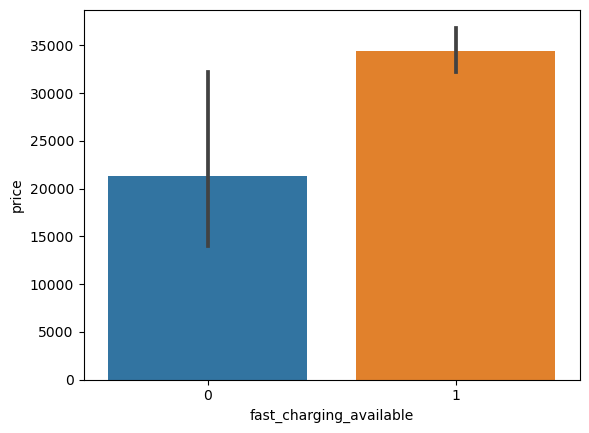

In [115]:
sns.barplot(data=df, x = df.fast_charging_available, y = df.price)

### Insights
1. Xiaomi, Samsung, Vivo, Realme, Oppo, and Apple are among the top brands with significant market shares.
2. Pricing is right-skewed with outliers, particularly for premium design and luxury editions
3. 5G adoption is increasing, NFC availability is moderate, and IR blaster is common in Chinese brands
4. Most phones have ample internal memory and support for extended memory
5. Processor speed distribution is bimodal, battery capacity varies widely and the majority of smartphones fall in the screen-size range of 6-7 inches, indicating a preference for larger display sizes among
6. Android dominates the market, while iOS devices command premium prices
7. Camera quality and fast charging capabilities influence pricing.
8. 
Outliers phones are premium due to unique design features, despite similar specification
9. Certain processor brands and core configurations command higher prices
10. Higher camera resolutions (both rear and front) and additional camera units contribute significantly to price variations in smartphones
11. Most phones with primary front cameras above 38 megapixels are from brands like Vivo, Motorola, and some Samsung
 models.


### Recommendations
1. Highlight 5G capabilities in marketing to attract tech-savvy consumers and consider NFC integration for enhanced connectivity
2. Emphasise storage capacity in product descriptions and marketing materials to appeal to consumers’ storage  needs
3. Highlight camera features and fast charging technology in product marketing to attract photography enthusiasts and users seeking convenience
4. Capitalise on brand loyalty and ecosystem advantages for iOS devices, and offer competitive pricing for Android devices